In [21]:
import redisai
import numpy as np
from sklearn import datasets
import ml2rt
import matplotlib.pyplot as plt
%matplotlib inline

class Object(object): pass

In [3]:
test = Object()

In [6]:
test.redis = redisai.Client()
test.raw = datasets.fetch_mldata('MNIST original')
test.X = test.raw.data.reshape(-1, 28, 28).astype(np.float32)
test.y = test.raw.target.astype(np.float32)

/Users/kalininalex/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/Users/kalininalex/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
test.X.shape

(70000, 28, 28)

In [9]:
test.model = ml2rt.load_model('model.pt')

In [105]:
def predict_redis(redis, x, y, n=None):
    if n is None:
        n = np.random.randint(x.shape[0])
    image = x[n]
    image = np.expand_dims(image, axis=0)
    image = np.expand_dims(image, axis=0)
    redis.tensorset('image', image)
    redis.modelrun('lenet', ['image'], ['pred'])
    pred = redis.tensorget('pred')
    print('Index', n, 'Pred:',     np.argmax(pred), 'Actual', y[n])
    plt.imshow(x[n], cmap="gray")

Index 8146 Pred: 1 Actual 1.0


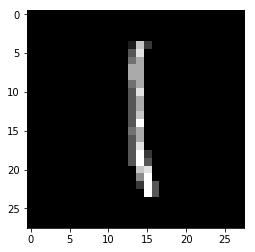

In [261]:
predict_redis(test.redis, test.X, test.y)